In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# TikTok Analysis

In [3]:
df = pd.read_parquet("/content/tiktok data.parquet")
df.head()

,id,text_x,textLanguage,createTime_x,createTimeISO_x,isAd,authorMeta,musicMeta,webVideoUrl,mediaUrls,...,repliesToId,replyCommentTotal,uid,uniqueId,avatarThumbnail,mentions_y,detailedMentions_y,Author Handle,url,error
0,7555959512583261184,#tiktkok #nrm #fyppppppppppppppppppppppp #bobi...,un,1759258925,2025-09-30T19:02:05.000Z,False,"{'id': '7240078407828390918', 'name': 'lawyeru...","{'musicName': 'original sound', 'musicAuthor':...",https://www.tiktok.com/@lawyerug1/video/755595...,[],...,NaN,0.0,7.222205e+18,birungimercy872,https://p16-common-sign.tiktokcdn-us.com/tos-m...,[],[],@lawyerug1,None,None
1,7555959512583261184,#tiktkok #nrm #fyppppppppppppppppppppppp #bobi...,un,1759258925,2025-09-30T19:02:05.000Z,False,"{'id': '7240078407828390918', 'name': 'lawyeru...","{'musicName': 'original sound', 'musicAuthor':...",https://www.tiktok.com/@lawyerug1/video/755595...,[],...,NaN,0.0,7.142179e+18,keztravelconsultancy,https://p16-common-sign.tiktokcdn-us.com/tos-m...,[],[],@lawyerug1,None,None
2,7555959512583261184,#tiktkok #nrm #fyppppppppppppppppppppppp #bobi...,un,1759258925,2025-09-30T19:02:05.000Z,False,"{'id': '7240078407828390918', 'name': 'lawyeru...","{'musicName': 'original sound', 'musicAuthor':...",https://www.tiktok.com/@lawyerug1/video/755595...,[],...,NaN,1.0,7.267820e+18,superagent379,https://p16-common-sign.tiktokcdn-us.com/tos-m...,[],[],@lawyerug1,None,None
3,7555959512583261184,#tiktkok #nrm #fyppppppppppppppppppppppp #bobi...,un,1759258925,2025-09-30T19:02:05.000Z,False,"{'id': '7240078407828390918', 'name': 'lawyeru...","{'musicName': 'original sound', 'musicAuthor':...",https://www.tiktok.com/@lawyerug1/video/755595...,[],...,NaN,0.0,7.237085e+18,goldkrahmah,https://p16-common-sign.tiktokcdn-us.com/tos-m...,[],[],@lawyerug1,None,None
4,7555959512583261184,#tiktkok #nrm #fyppppppppppppppppppppppp #bobi...,un,1759258925,2025-09-30T19:02:05.000Z,False,"{'id': '7240078407828390918', 'name': 'lawyeru...","{'musicName': 'original sound', 'musicAuthor':...",https://www.tiktok.com/@lawyerug1/video/755595...,[],...,NaN,0.0,7.530027e+18,king.derricks,https://p16-common-sign.tiktokcdn-us.com/tos-m...,[],[],@lawyerug1,None,None


In [4]:
df.columns

Index(['id', 'text_x', 'textLanguage', 'createTime_x', 'createTimeISO_x',
       'isAd', 'authorMeta', 'musicMeta', 'webVideoUrl', 'mediaUrls',
       'videoMeta', 'diggCount_x', 'shareCount', 'playCount', 'collectCount',
       'commentCount', 'mentions_x', 'detailedMentions_x', 'hashtags',
       'effectStickers', 'isSlideshow', 'isPinned', 'isSponsored', 'input_x',
       'fromProfileSection', 'isMuted', 'slideshowImageLinks', 'videoWebUrl',
       'submittedVideoUrl', 'input_y', 'cid', 'createTime_y',
       'createTimeISO_y', 'text_y', 'diggCount_y', 'likedByAuthor',
       'pinnedByAuthor', 'repliesToId', 'replyCommentTotal', 'uid', 'uniqueId',
       'avatarThumbnail', 'mentions_y', 'detailedMentions_y', 'Author Handle',
       'url', 'error'],
      dtype='object')

In [5]:
df['date'] = pd.to_datetime(df['createTime_x'], unit='s')
df['date']

,date
0,2025-09-30 19:02:05
1,2025-09-30 19:02:05
2,2025-09-30 19:02:05
3,2025-09-30 19:02:05
4,2025-09-30 19:02:05
...,...
508304,2025-11-14 16:54:24
508305,2025-11-14 16:48:59
508306,2025-11-14 16:44:52
508307,2025-11-14 15:39:35


## Posts Distribution over time

In [18]:
import ast

def get_username(val):
    if isinstance(val, dict):
        return val.get('name')

    if isinstance(val, str):
        try:
            val_dict = ast.literal_eval(val)
            if isinstance(val_dict, dict):
                return val_dict.get('name')
        except (ValueError, SyntaxError):
            return None

    return None

df['post author'] = df['authorMeta'].apply(get_username)

print(df['post author'].head())

0    lawyerug1
1    lawyerug1
2    lawyerug1
3    lawyerug1
4    lawyerug1
Name: post author, dtype: object


In [19]:
posts_df = df.apply(tuple)

posts_df

,id,text_x,textLanguage,createTime_x,createTimeISO_x,isAd,authorMeta,musicMeta,webVideoUrl,mediaUrls,...,uid,uniqueId,avatarThumbnail,mentions_y,detailedMentions_y,Author Handle,url,error,date,post author
0,7555959512583261184,#tiktkok #nrm #fyppppppppppppppppppppppp #bobi...,un,1759258925,2025-09-30T19:02:05.000Z,False,"{'id': '7240078407828390918', 'name': 'lawyeru...","{'musicName': 'original sound', 'musicAuthor':...",https://www.tiktok.com/@lawyerug1/video/755595...,[],...,7.222205e+18,birungimercy872,https://p16-common-sign.tiktokcdn-us.com/tos-m...,[],[],@lawyerug1,None,None,2025-09-30 19:02:05,lawyerug1
1,7555959512583261184,#tiktkok #nrm #fyppppppppppppppppppppppp #bobi...,un,1759258925,2025-09-30T19:02:05.000Z,False,"{'id': '7240078407828390918', 'name': 'lawyeru...","{'musicName': 'original sound', 'musicAuthor':...",https://www.tiktok.com/@lawyerug1/video/755595...,[],...,7.142179e+18,keztravelconsultancy,https://p16-common-sign.tiktokcdn-us.com/tos-m...,[],[],@lawyerug1,None,None,2025-09-30 19:02:05,lawyerug1
2,7555959512583261184,#tiktkok #nrm #fyppppppppppppppppppppppp #bobi...,un,1759258925,2025-09-30T19:02:05.000Z,False,"{'id': '7240078407828390918', 'name': 'lawyeru...","{'musicName': 'original sound', 'musicAuthor':...",https://www.tiktok.com/@lawyerug1/video/755595...,[],...,7.267820e+18,superagent379,https://p16-common-sign.tiktokcdn-us.com/tos-m...,[],[],@lawyerug1,None,None,2025-09-30 19:02:05,lawyerug1
3,7555959512583261184,#tiktkok #nrm #fyppppppppppppppppppppppp #bobi...,un,1759258925,2025-09-30T19:02:05.000Z,False,"{'id': '7240078407828390918', 'name': 'lawyeru...","{'musicName': 'original sound', 'musicAuthor':...",https://www.tiktok.com/@lawyerug1/video/755595...,[],...,7.237085e+18,goldkrahmah,https://p16-common-sign.tiktokcdn-us.com/tos-m...,[],[],@lawyerug1,None,None,2025-09-30 19:02:05,lawyerug1
4,7555959512583261184,#tiktkok #nrm #fyppppppppppppppppppppppp #bobi...,un,1759258925,2025-09-30T19:02:05.000Z,False,"{'id': '7240078407828390918', 'name': 'lawyeru...","{'musicName': 'original sound', 'musicAuthor':...",https://www.tiktok.com/@lawyerug1/video/755595...,[],...,7.530027e+18,king.derricks,https://p16-common-sign.tiktokcdn-us.com/tos-m...,[],[],@lawyerug1,None,None,2025-09-30 19:02:05,lawyerug1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508304,7572625456382446904,None,un,1763139264,2025-11-14T16:54:24.000Z,False,"{'id': '6830123880653620230', 'name': 'sheilah...","{'musicName': 'original sound', 'musicAuthor':...",https://www.tiktok.com/@sheilahprice.tv/video/...,[],...,NaN,None,None,None,None,None,None,None,2025-11-14 16:54:24,sheilahprice.tv
508305,7572624059008093451,None,un,1763138939,2025-11-14T16:48:59.000Z,False,"{'id': '6830123880653620230', 'name': 'sheilah...","{'musicName': 'Tokyuka', 'musicAuthor': 'Chose...",https://www.tiktok.com/@sheilahprice.tv/video/...,[],...,NaN,None,None,None,None,None,None,None,2025-11-14 16:48:59,sheilahprice.tv
508306,7572622984637205772,None,un,1763138692,2025-11-14T16:44:52.000Z,False,"{'id': '6830123880653620230', 'name': 'sheilah...","{'musicName': 'original sound', 'musicAuthor':...",https://www.tiktok.com/@sheilahprice.tv/video/...,[],...,NaN,None,None,None,None,None,None,None,2025-11-14 16:44:52,sheilahprice.tv
508307,7572606179080146232,None,un,1763134775,2025-11-14T15:39:35.000Z,False,"{'id': '6830123880653620230', 'name': 'sheilah...","{'musicName': 'original sound', 'musicAuthor':...",https://www.tiktok.com/@sheilahprice.tv/video/...,[],...,NaN,None,None,None,None,None,None,None,2025-11-14 15:39:35,sheilahprice.tv


In [20]:
posts_df.drop_duplicates(subset=['id'], inplace=True)
posts_df

,id,text_x,textLanguage,createTime_x,createTimeISO_x,isAd,authorMeta,musicMeta,webVideoUrl,mediaUrls,...,uid,uniqueId,avatarThumbnail,mentions_y,detailedMentions_y,Author Handle,url,error,date,post author
0,7555959512583261184,#tiktkok #nrm #fyppppppppppppppppppppppp #bobi...,un,1759258925,2025-09-30T19:02:05.000Z,False,"{'id': '7240078407828390918', 'name': 'lawyeru...","{'musicName': 'original sound', 'musicAuthor':...",https://www.tiktok.com/@lawyerug1/video/755595...,[],...,7.222205e+18,birungimercy872,https://p16-common-sign.tiktokcdn-us.com/tos-m...,[],[],@lawyerug1,None,None,2025-09-30 19:02:05,lawyerug1
264,7555914823997967360,#foryoupage #bobiwineuganda✊✊✊✊✊✊ #fyppppppppp...,un,1759248522,2025-09-30T16:08:42.000Z,False,"{'id': '7240078407828390918', 'name': 'lawyeru...",{'musicName': 'Tick By Eddy Kenzo X Edgar X Os...,https://www.tiktok.com/@lawyerug1/video/755591...,[],...,7.297231e+18,fatuma.qasim,https://p77-sign-sg.tiktokcdn.com/tos-alisg-av...,[],[],@lawyerug1,None,None,2025-09-30 16:08:42,lawyerug1
332,7555848620629625856,#tiktkok #nrm #fyppppppppppppppppppppppp #bobi...,un,1759233103,2025-09-30T11:51:43.000Z,False,"{'id': '7240078407828390918', 'name': 'lawyeru...","{'musicName': 'original sound', 'musicAuthor':...",https://www.tiktok.com/@lawyerug1/video/755584...,[],...,7.267820e+18,superagent379,https://p16-common-sign.tiktokcdn-us.com/tos-m...,[],[],@lawyerug1,None,None,2025-09-30 11:51:43,lawyerug1
418,7555598229262322688,#tiktkok #bobiwineuganda✊✊✊✊✊✊ #viralvideos #f...,un,1759174804,2025-09-29T19:40:04.000Z,False,"{'id': '7240078407828390918', 'name': 'lawyeru...","{'musicName': 'original sound', 'musicAuthor':...",https://www.tiktok.com/@lawyerug1/video/755559...,[],...,7.199937e+18,user5881718053887,https://p16-common-sign.tiktokcdn-us.com/tos-m...,[],[],@lawyerug1,None,None,2025-09-29 19:40:04,lawyerug1
424,7554827091070487552,#nrm #fyppppppppppppppppppppppp #viralvideos #...,un,1758995260,2025-09-27T17:47:40.000Z,False,"{'id': '7240078407828390918', 'name': 'lawyeru...","{'musicName': 'original sound', 'musicAuthor':...",https://www.tiktok.com/@lawyerug1/video/755482...,[],...,7.339854e+18,araali164,https://p16-common-sign.tiktokcdn-us.com/tos-m...,[],[],@lawyerug1,None,None,2025-09-27 17:47:40,lawyerug1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508304,7572625456382446904,None,un,1763139264,2025-11-14T16:54:24.000Z,False,"{'id': '6830123880653620230', 'name': 'sheilah...","{'musicName': 'original sound', 'musicAuthor':...",https://www.tiktok.com/@sheilahprice.tv/video/...,[],...,NaN,None,None,None,None,None,None,None,2025-11-14 16:54:24,sheilahprice.tv
508305,7572624059008093451,None,un,1763138939,2025-11-14T16:48:59.000Z,False,"{'id': '6830123880653620230', 'name': 'sheilah...","{'musicName': 'Tokyuka', 'musicAuthor': 'Chose...",https://www.tiktok.com/@sheilahprice.tv/video/...,[],...,NaN,None,None,None,None,None,None,None,2025-11-14 16:48:59,sheilahprice.tv
508306,7572622984637205772,None,un,1763138692,2025-11-14T16:44:52.000Z,False,"{'id': '6830123880653620230', 'name': 'sheilah...","{'musicName': 'original sound', 'musicAuthor':...",https://www.tiktok.com/@sheilahprice.tv/video/...,[],...,NaN,None,None,None,None,None,None,None,2025-11-14 16:44:52,sheilahprice.tv
508307,7572606179080146232,None,un,1763134775,2025-11-14T15:39:35.000Z,False,"{'id': '6830123880653620230', 'name': 'sheilah...","{'musicName': 'original sound', 'musicAuthor':...",https://www.tiktok.com/@sheilahprice.tv/video/...,[],...,NaN,None,None,None,None,None,None,None,2025-11-14 15:39:35,sheilahprice.tv


In [21]:
posts_df['date'] = pd.to_datetime(posts_df['createTime_x'], unit='s')
posts_df['date']

,date
0,2025-09-30 19:02:05
264,2025-09-30 16:08:42
332,2025-09-30 11:51:43
418,2025-09-29 19:40:04
424,2025-09-27 17:47:40
...,...
508304,2025-11-14 16:54:24
508305,2025-11-14 16:48:59
508306,2025-11-14 16:44:52
508307,2025-11-14 15:39:35


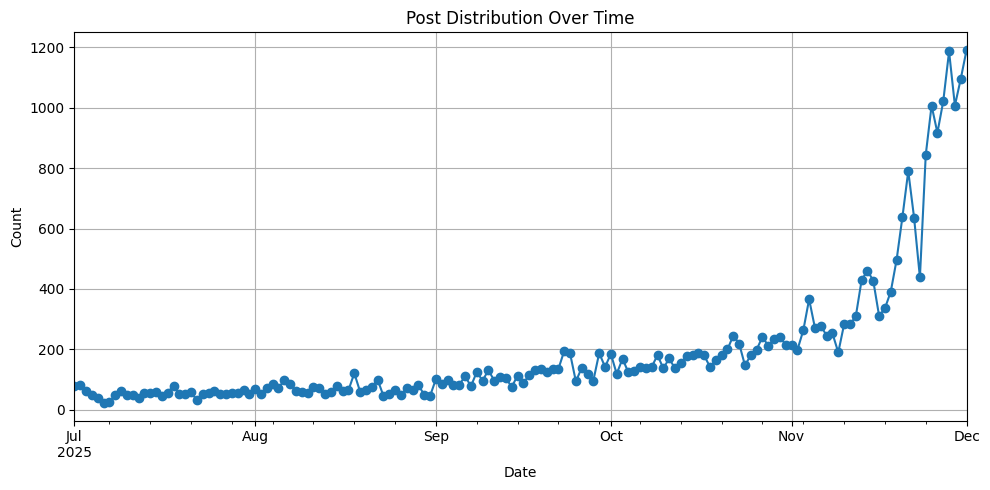

In [22]:
daily_counts = posts_df.set_index('date').resample('D').size()

# Plot the results
plt.figure(figsize=(10, 5))
daily_counts.plot(kind='line', marker='o')

plt.title('Post Distribution Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()
plt.show()

## Who are the most active participants in election-related conversations?


In [23]:
df['authorMeta'].iloc[0]

"{'id': '7240078407828390918', 'name': 'lawyerug1', 'profileUrl': 'https://www.tiktok.com/@lawyerug1', 'nickName': 'Lawyer Ug', 'verified': False, 'signature': 'BUSINESS 👉0.7.0.1.4.4.8.5.6.4', 'bioLink': None, 'originalAvatarUrl': 'https://p16-common-sign.tiktokcdn-us.com/tos-maliva-avt-0068/23da1ac94f0be67b55a43d2ab94d4cb2~tplv-tiktokx-cropcenter:720:720.jpeg?dr=9640&refresh_token=71b407bc&x-expires=1764892800&x-signature=HmCkX%2FN3obvG6Af%2BR%2FilCkzOZPs%3D&t=4d5b0474&ps=13740610&shp=a5d48078&shcp=81f88b70&idc=useast8', 'avatar': 'https://p16-common-sign.tiktokcdn-us.com/tos-maliva-avt-0068/23da1ac94f0be67b55a43d2ab94d4cb2~tplv-tiktokx-cropcenter:720:720.jpeg?dr=9640&refresh_token=71b407bc&x-expires=1764892800&x-signature=HmCkX%2FN3obvG6Af%2BR%2FilCkzOZPs%3D&t=4d5b0474&ps=13740610&shp=a5d48078&shcp=81f88b70&idc=useast8', 'commerceUserInfo': {'commerceUser': False}, 'privateAccount': False, 'roomId': '', 'ttSeller': False, 'following': 93, 'friends': 27, 'fans': 115000, 'heart': 11000

In [24]:
df.columns

Index(['id', 'text_x', 'textLanguage', 'createTime_x', 'createTimeISO_x',
       'isAd', 'authorMeta', 'musicMeta', 'webVideoUrl', 'mediaUrls',
       'videoMeta', 'diggCount_x', 'shareCount', 'playCount', 'collectCount',
       'commentCount', 'mentions_x', 'detailedMentions_x', 'hashtags',
       'effectStickers', 'isSlideshow', 'isPinned', 'isSponsored', 'input_x',
       'fromProfileSection', 'isMuted', 'slideshowImageLinks', 'videoWebUrl',
       'submittedVideoUrl', 'input_y', 'cid', 'createTime_y',
       'createTimeISO_y', 'text_y', 'diggCount_y', 'likedByAuthor',
       'pinnedByAuthor', 'repliesToId', 'replyCommentTotal', 'uid', 'uniqueId',
       'avatarThumbnail', 'mentions_y', 'detailedMentions_y', 'Author Handle',
       'url', 'error', 'date', 'post author'],
      dtype='object')

In [25]:
df_authors = posts_df['post author'].unique()
df_authors

array(['lawyerug1', 'thesmediaug', 'mordecaimuriisa', 'ubctv', 'faltd',
       'sanyukatvug', 'king_saha256', 'kattyvillemedia',
       'nkundabaana2026', 'jchameleone', 'wabomba.colline',
       'jonahkatz100', 'latifsebaggala', 'bajjoevents', 'masakatveyaffe',
       'skysoljahug', 'josemulangiraoffi', 'sure.media',
       'iambarbiekyagulanyi', 'sabula_tv', 'politics234',
       'cypherefxproduction', 'abraham.the.legen', 'nadianakimuli',
       'omunene.kachumbal', 'pointmedia27', 'genzoganya', 'brianmediaug',
       'evelyn.swicky', 'kagilita.kasala', 'dr.fredsebbaale_official',
       'theallianceug', 'bukeddetvuganda', 'rodeza26', 'plutv.1',
       'alobojoanacom', 'immywafiifi', 'famouskaaya', 'sirallanlwanga',
       'ericbrynnecavalary', 'promoter.hussein', 'spinningmedia',
       'senkayi.media.256', 'mukisa_official1', 'bobirashmedia3',
       'joblessbillionre', 'msignaltv2026', 'mrjimz1', 'paletonespaces',
       'ali.zurich7', 'tracypatner', 'princekim32', 'teso.spear',


In [26]:
# Count the number of posts per page/user
posts_df['post author'].value_counts()

,count
post author,
king_saha256,800
sanyukatvug,800
faltd,800
wabomba.colline,800
jonahkatz100,800
...,...
iambarbiekyagulanyi,62
promoter.hussein,20
paletonespaces,14


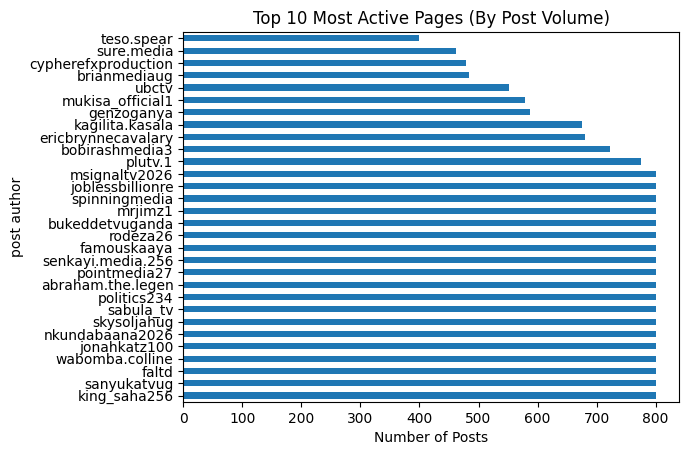

In [27]:
# Count the number of posts per page/user
top_posters = posts_df['post author'].value_counts().head(30)

# Visualization
top_posters.plot(kind='barh', title='Top 10 Most Active Pages (By Post Volume)')
plt.xlabel('Number of Posts')
plt.show()

# author with the most posts targeting elections

In [31]:
import re

In [32]:
posts_df.columns

Index(['id', 'text_x', 'textLanguage', 'createTime_x', 'createTimeISO_x',
       'isAd', 'authorMeta', 'musicMeta', 'webVideoUrl', 'mediaUrls',
       'videoMeta', 'diggCount_x', 'shareCount', 'playCount', 'collectCount',
       'commentCount', 'mentions_x', 'detailedMentions_x', 'hashtags',
       'effectStickers', 'isSlideshow', 'isPinned', 'isSponsored', 'input_x',
       'fromProfileSection', 'isMuted', 'slideshowImageLinks', 'videoWebUrl',
       'submittedVideoUrl', 'input_y', 'cid', 'createTime_y',
       'createTimeISO_y', 'text_y', 'diggCount_y', 'likedByAuthor',
       'pinnedByAuthor', 'repliesToId', 'replyCommentTotal', 'uid', 'uniqueId',
       'avatarThumbnail', 'mentions_y', 'detailedMentions_y', 'Author Handle',
       'url', 'error', 'date', 'post author'],
      dtype='object')

In [33]:
election_keywords = [
    r'vote',
    r'museveni',
    r'bobi',
    r'election'
]

pattern = '|'.join(election_keywords)


In [34]:
df['hashtags'] = df['hashtags'].astype(str)

election_df = df[
    df['hashtags'].str.contains(pattern, flags=re.IGNORECASE, regex=True, na=False)
]


In [35]:
author_counts = (
    election_df
    .groupby('post author')
    .size()
    .sort_values(ascending=False)
)


In [36]:
top_author = author_counts.idxmax()
top_author_posts = author_counts.max()

print(f"Author with most election-related posts: {top_author} ({top_author_posts} posts)")


Author with most election-related posts: faltd (17278 posts)


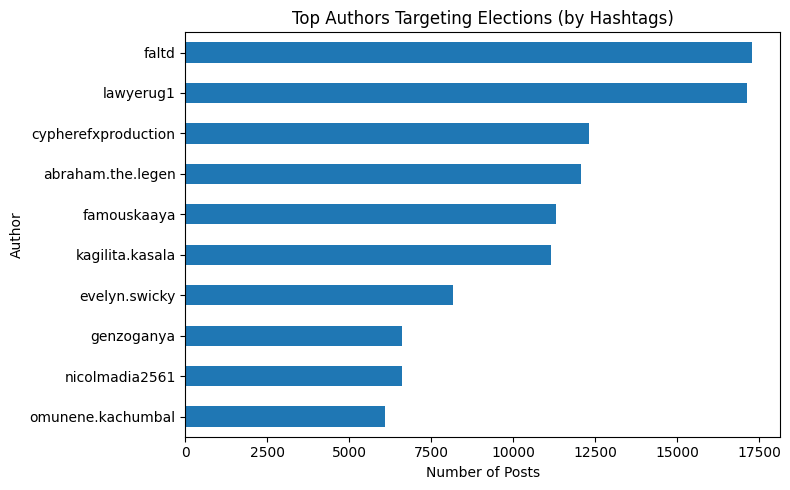

In [37]:
plt.figure(figsize=(8, 5))
author_counts.head(10).plot(kind='barh')
plt.gca().invert_yaxis()
plt.title("Top Authors Targeting Elections (by Hashtags)")
plt.xlabel("Number of Posts")
plt.ylabel("Author")
plt.tight_layout()
plt.show()


## By Engagement (Impact)

In [38]:
posts_df[['diggCount_x', 'shareCount', 'playCount', 'collectCount', 'commentCount']]

,diggCount_x,shareCount,playCount,collectCount,commentCount
0,1660,21,50500,103,272
264,1394,15,58900,72,74
332,512,5,19900,36,90
418,187,2,3740,11,7
424,1340,88,28000,115,225
...,...,...,...,...,...
508304,72000,1381,785500,4888,1928
508305,11200,21,112000,343,229
508306,5003,345,73900,312,743
508307,2226,5,40400,98,115


<Figure size 1200x600 with 0 Axes>

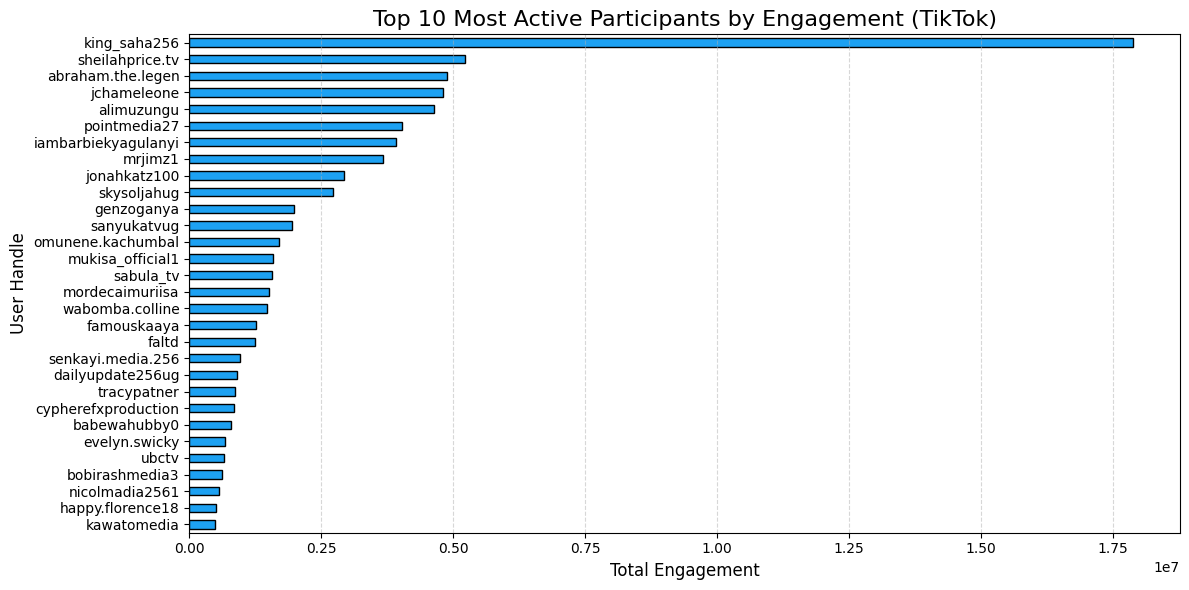

In [39]:
plt.figure(figsize=(12, 6))

metrics = ['diggCount_x']

posts_df[metrics] = posts_df[metrics].apply(pd.to_numeric, errors='coerce').fillna(0)

posts_df['total_engagement'] = posts_df[metrics].sum(axis=1)

top_engaged = posts_df.groupby('post author')['total_engagement'].sum()

top_10_engaged = top_engaged.sort_values(ascending=False).head(30)

plt.figure(figsize=(12, 6))

top_10_engaged.sort_values(ascending=True).plot(
    kind='barh',
    color='#1DA1F2',
    edgecolor='black'
)

plt.title('Top 10 Most Active Participants by Engagement (TikTok)', fontsize=16)
plt.xlabel('Total Engagement', fontsize=12)
plt.ylabel('User Handle', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()

## percentage coverage of the top authors

In [40]:
top_engaged = (
    posts_df
    .groupby('post author')['total_engagement']
    .sum()
    .sort_values(ascending=False)
)

In [41]:
top_20_engagement = top_engaged.head(20).sum()
rest_engagement = top_engaged.iloc[20:].sum()

In [42]:
labels = ['Top 20 Accounts', 'All Other Accounts']
sizes = [top_20_engagement, rest_engagement]


In [43]:
sizes

[np.int64(69910096), np.int64(14377251)]

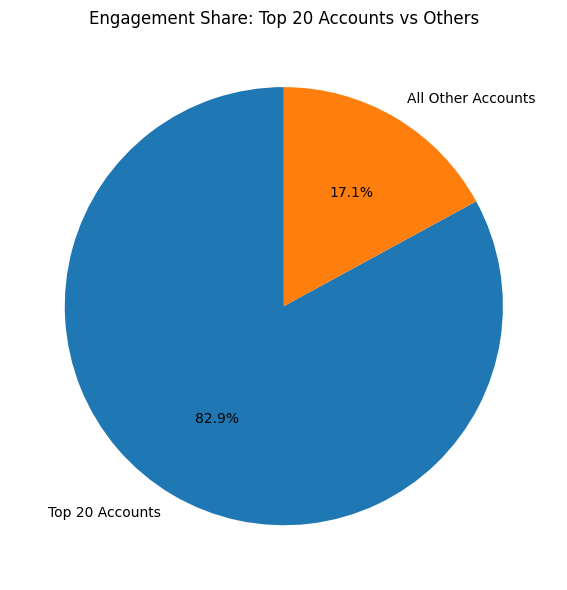

In [44]:

plt.figure(figsize=(6, 6))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Engagement Share: Top 20 Accounts vs Others')
plt.tight_layout()
plt.show()


## Comparison of engagement through likes, comments and shares

<Figure size 2000x1000 with 0 Axes>

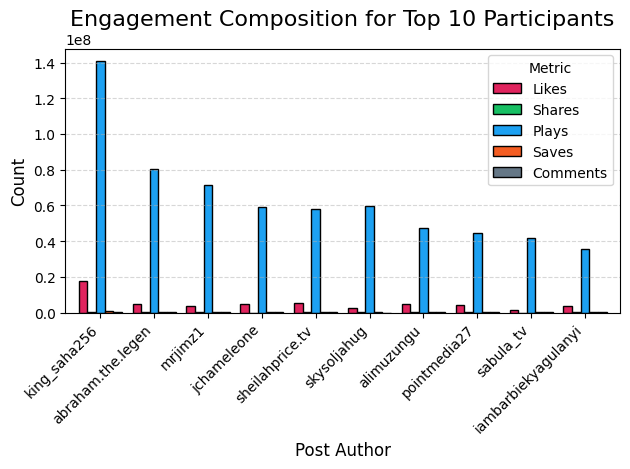

In [45]:
metrics = ['diggCount_x', 'shareCount', 'playCount', 'collectCount', 'commentCount']

metrics = [m for m in metrics if m in posts_df.columns]

posts_df[metrics] = posts_df[metrics].apply(pd.to_numeric, errors='coerce').fillna(0)

author_col = 'post author' if 'post author' in posts_df.columns else 'Author Handle'

author_stats = posts_df.groupby(author_col)[metrics].sum()

author_stats['total_sum'] = author_stats.sum(axis=1)

top_10_breakdown = (
    author_stats
    .sort_values(by='total_sum', ascending=False)
    .head(10)
    .drop(columns='total_sum')
)

plt.figure(figsize=(20, 10))

colors = [
    '#E0245E',
    '#17BF63',
    '#1DA1F2',
    '#F45D22',
    '#657786'
]

top_10_breakdown.plot(
    kind='bar',
    width=0.8,
    color=colors[:len(metrics)],
    edgecolor='black'
)

# Formatting
plt.title('Engagement Composition for Top 10 Participants', fontsize=16)
plt.xlabel('Post Author', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(
    title='Metric',
    labels=['Likes', 'Shares', 'Plays', 'Saves', 'Comments'][:len(metrics)]
)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()

In [46]:
top_10_breakdown

,diggCount_x,shareCount,playCount,collectCount,commentCount
post author,,,,,
king_saha256,17871530,238446,140821600,934188,360184
abraham.the.legen,4874790,360684,80403402,337534,243306
mrjimz1,3675114,202580,71386026,191048,132302
jchameleone,4809840,45982,59377000,209480,134284
sheilahprice.tv,5211376,59938,58112261,238830,192590
skysoljahug,2724382,67050,59457810,105168,47434
alimuzungu,4637443,125330,47127103,280470,213668
pointmedia27,4030000,343824,44620340,250112,196960
sabula_tv,1557956,28946,41653626,64308,55180


### difference between number of likes to the number of plays of the top 10 authors

In [47]:
top_10_breakdown['diggCount_x'] - top_10_breakdown['playCount']

,0
post author,
king_saha256,-122950070
abraham.the.legen,-75528612
mrjimz1,-67710912
jchameleone,-54567160
sheilahprice.tv,-52900885
skysoljahug,-56733428
alimuzungu,-42489660
pointmedia27,-40590340
sabula_tv,-40095670


## Music analysis


In [48]:
df['musicMeta'].iloc[0]

"{'musicName': 'original sound', 'musicAuthor': 'Lawyer Ug', 'musicOriginal': True, 'playUrl': 'https://v16m.tiktokcdn-eu.com/1fff6c7894fdd042e51830dbfe673851/6930dd54/video/tos/useast2a/tos-useast2a-v-27dcd7/oUDAkwK1EEC1bPsvLUailcBSTCi4QANaMAKAp/?a=1233&bti=ODszNWYuMDE6&ch=0&cr=0&dr=0&er=0&lr=default&cd=0%7C0%7C0%7C0&br=250&bt=125&ds=5&ft=.NpOcInz7ThvzxvPXq8Zmo&mime_type=audio_mpeg&qs=13&rc=anVseG85cmY1NjMzNzU8M0BpanVseG85cmY1NjMzNzU8M0BrNTIyMmQ0ZmJhLS1kMTZzYSNrNTIyMmQ0ZmJhLS1kMTZzcw%3D%3D&vvpl=1&l=20251203005953AA4A3013C7655E023BDD&btag=e00050000', 'coverMediumUrl': 'https://p16-sign-va.tiktokcdn.com/tos-maliva-avt-0068/23da1ac94f0be67b55a43d2ab94d4cb2~tplv-tiktokx-cropcenter:720:720.jpeg?dr=10399&refresh_token=c5029da9&x-expires=1764892800&x-signature=TIG2eCpPD%2BuXCR4G%2BR0bAUaK%2Bv4%3D&t=4d5b0474&ps=13740610&shp=a5d48078&shcp=81f88b70&idc=useast2b', 'originalCoverMediumUrl': 'https://p16-sign-va.tiktokcdn.com/tos-maliva-avt-0068/23da1ac94f0be67b55a43d2ab94d4cb2~tplv-tiktokx-cropce

In [49]:
import ast
import pandas as pd

def parse_music(meta):
    if isinstance(meta, dict):
        return meta
    if isinstance(meta, str):
        try:
            return ast.literal_eval(meta)
        except:
            return {}
    return {}

posts_df['musicMeta_parsed'] = posts_df['musicMeta'].apply(parse_music)

# Extract key fields
posts_df['musicName'] = posts_df['musicMeta_parsed'].apply(lambda x: x.get('musicName'))
posts_df['musicAuthor'] = posts_df['musicMeta_parsed'].apply(lambda x: x.get('musicAuthor'))
posts_df['musicOriginal'] = posts_df['musicMeta_parsed'].apply(lambda x: x.get('musicOriginal'))
posts_df['musicId'] = posts_df['musicMeta_parsed'].apply(lambda x: x.get('musicId'))

## most used songs

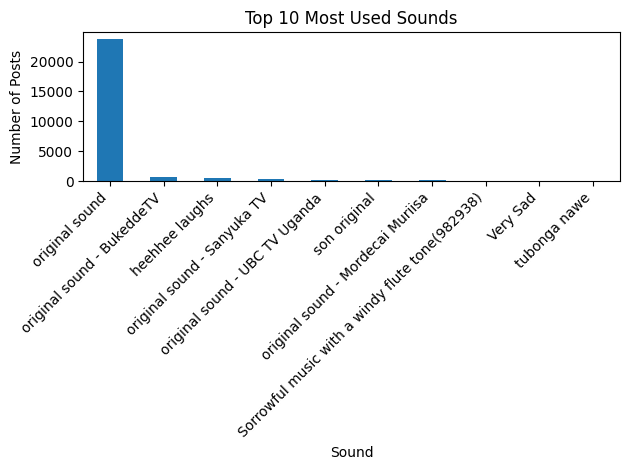

In [50]:
top_songs = (
    posts_df.groupby('musicName')
      .size()
      .sort_values(ascending=False)
      .head(10)
)

plt.figure()
top_songs.plot(kind='bar')
plt.title("Top 10 Most Used Sounds")
plt.xlabel("Sound")
plt.ylabel("Number of Posts")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [51]:
posts_df.shape

(29569, 55)

In [52]:
original_df = posts_df[posts_df['musicName'] == 'original sound']
original_df.shape

(23705, 55)

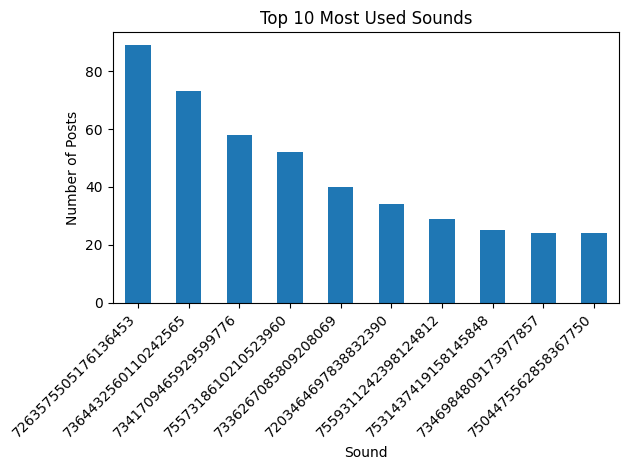

In [53]:
top_songs = (
    original_df.groupby('musicId')
      .size()
      .sort_values(ascending=False)
      .head(10)
)

plt.figure()
top_songs.plot(kind='bar')
plt.title("Top 10 Most Used Sounds")
plt.xlabel("Sound")
plt.ylabel("Number of Posts")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [54]:
authors = original_df[original_df['musicId'] == '7263575505176136453']
authors['post author'].unique()

array(['kagilita.kasala', 'ramcorp_updates'], dtype=object)

In [55]:
songs_count = original_df.groupby('musicId').size().sort_values(ascending=False).head(n=10)
songs_count

,0
musicId,
7263575505176136453,89
7364432560110242565,73
7341709465929599776,58
7557318610210523960,52
7336267085809208069,40
7203464697838832390,34
7559311242398124812,29
7531437419158145848,25
7346984809173977857,24


In [56]:
sum(songs_count.values)

np.int64(448)

In [57]:
# get the first occurrence from the posts df where music id is '7263575505176136453'
posts_df[posts_df['musicId'] == '7263575505176136453']['musicMeta'].iloc[0]


"{'musicName': 'original sound', 'musicAuthor': 'Barış Alper Yılmaz', 'musicOriginal': True, 'playUrl': 'https://v77.tiktokcdn.com/06b015323f3a963dd8373842d590e23d/693358eb/video/tos/useast2a/tos-useast2a-v-27dcd7/oIOZztH6KhQkE3ZW1AyofANNERErBAFADgWAW0/?a=1233&bti=ODszNWYuMDE6&ch=0&cr=0&dr=0&er=0&lr=default&cd=0%7C0%7C0%7C0&br=250&bt=125&ds=5&ft=.NpOcInz7ThV8uiPXq8Zmo&mime_type=audio_mpeg&qs=13&rc=M3BybTo6ZndwbTMzNzU8M0BpM3BybTo6ZndwbTMzNzU8M0AtXl5ucjRfYjNgLS1kMTZzYSMtXl5ucjRfYjNgLS1kMTZzcw%3D%3D&vvpl=1&l=202512050611426C762A0F6F3C002D820C&btag=e00050000&cc=13', 'coverMediumUrl': 'https://p16-sign-sg.tiktokcdn.com/tos-alisg-avt-0068/639ef260d953c6fa5bb75d5cf65fc88b~tplv-tiktokx-cropcenter:720:720.jpeg?dr=14579&refresh_token=822b9c2a&x-expires=1765058400&x-signature=DSXQW9%2BY2IRmUrkVM%2F6c6NGbL8M%3D&t=4d5b0474&ps=13740610&shp=a5d48078&shcp=81f88b70&idc=maliva', 'originalCoverMediumUrl': 'https://p16-sign-sg.tiktokcdn.com/tos-alisg-avt-0068/639ef260d953c6fa5bb75d5cf65fc88b~tplv-tiktokx-

## Original Songs Vs Reused

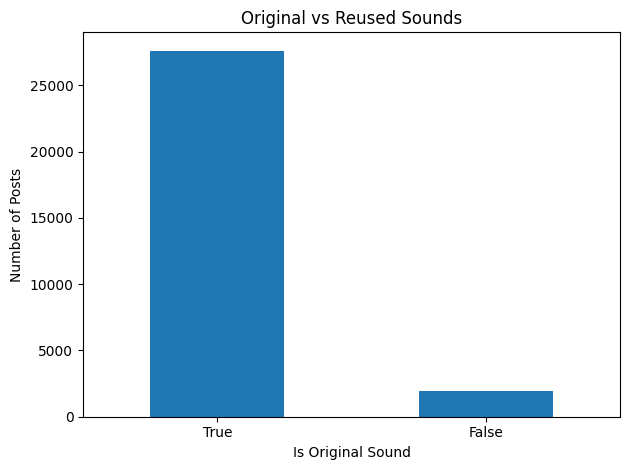

In [58]:
orig_dist = posts_df['musicOriginal'].value_counts()

plt.figure()
orig_dist.plot(kind='bar')
plt.title("Original vs Reused Sounds")
plt.xlabel("Is Original Sound")
plt.ylabel("Number of Posts")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


## Songs that get the most engagement

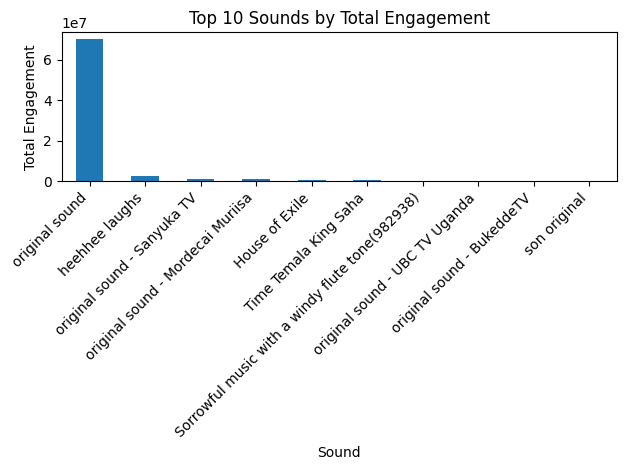

In [59]:
song_engagement = (
    posts_df.groupby('musicName')['total_engagement']
      .sum()
      .sort_values(ascending=False)
      .head(10)
)

plt.figure()
song_engagement.plot(kind='bar')
plt.title("Top 10 Sounds by Total Engagement")
plt.xlabel("Sound")
plt.ylabel("Total Engagement")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [60]:
sound_engagement = original_df.groupby('musicId')['total_engagement'].sum().sort_values(ascending=False).head(n = 10)
sound_engagement

,total_engagement
musicId,
7545443533042256646,586010
7447219514333170437,560090
7564088468620561163,529000
7535987847069698821,507600
7523851968381602591,505600
7558079584870484792,480782
7529828921693473592,446200
7541734142417931064,405800
7336267085809208069,389179


## Music trends overtime

In [61]:
posts_df['date'] = pd.to_datetime(posts_df['createTimeISO_x'], errors='coerce')

<Figure size 640x480 with 0 Axes>

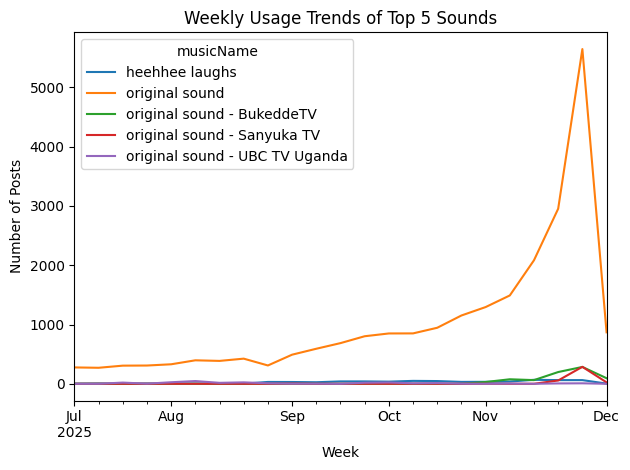

In [62]:
top5 = posts_df['musicName'].value_counts().head(5).index

music_time = (
    posts_df[posts_df['musicName'].isin(top5)]
    .groupby([pd.Grouper(key='date', freq='W'), 'musicName'])
    .size()
    .unstack(fill_value=0)
)

plt.figure()
music_time.plot()
plt.title("Weekly Usage Trends of Top 5 Sounds")
plt.xlabel("Week")
plt.ylabel("Number of Posts")
plt.tight_layout()
plt.show()


## Music usage by author (might be better to select particular candidate)

/tmp/ipython-input-44162848.py:16: UserWarning: Glyph 128165 (\N{COLLISION SYMBOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-44162848.py:16: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-44162848.py:16: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128165 (\N{COLLISION SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


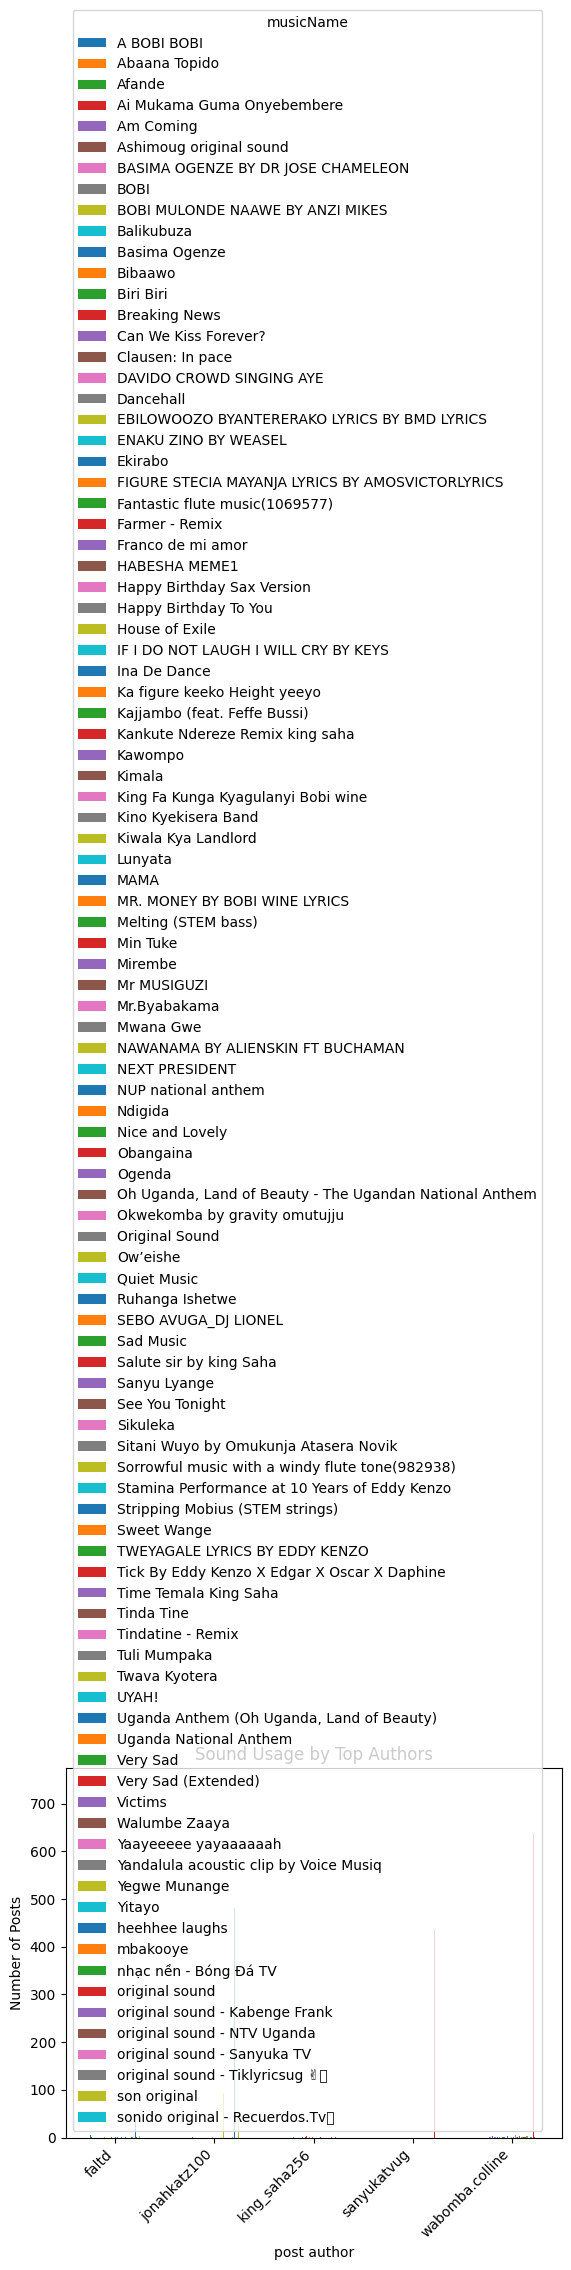

In [63]:
top_authors = posts_df['post author'].value_counts().head(5).index

author_music = (
    posts_df[posts_df['post author'].isin(top_authors)]
    .groupby(['post author', 'musicName'])
    .size()
    .unstack(fill_value=0)
)

plt.figure()
author_music.plot(kind='bar')
plt.title("Sound Usage by Top Authors")
plt.xlabel("post author")
plt.ylabel("Number of Posts")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## What are the dominant themes and narratives in election-related discussions?

In [68]:
df.head()

,id,text_x,textLanguage,createTime_x,createTimeISO_x,isAd,authorMeta,musicMeta,webVideoUrl,mediaUrls,...,uid,uniqueId,avatarThumbnail,mentions_y,detailedMentions_y,Author Handle,url,error,date,post author
0,7555959512583261184,#tiktkok #nrm #fyppppppppppppppppppppppp #bobi...,un,1759258925,2025-09-30T19:02:05.000Z,False,"{'id': '7240078407828390918', 'name': 'lawyeru...","{'musicName': 'original sound', 'musicAuthor':...",https://www.tiktok.com/@lawyerug1/video/755595...,[],...,7.222205e+18,birungimercy872,https://p16-common-sign.tiktokcdn-us.com/tos-m...,[],[],@lawyerug1,None,None,2025-09-30 19:02:05,lawyerug1
1,7555959512583261184,#tiktkok #nrm #fyppppppppppppppppppppppp #bobi...,un,1759258925,2025-09-30T19:02:05.000Z,False,"{'id': '7240078407828390918', 'name': 'lawyeru...","{'musicName': 'original sound', 'musicAuthor':...",https://www.tiktok.com/@lawyerug1/video/755595...,[],...,7.142179e+18,keztravelconsultancy,https://p16-common-sign.tiktokcdn-us.com/tos-m...,[],[],@lawyerug1,None,None,2025-09-30 19:02:05,lawyerug1
2,7555959512583261184,#tiktkok #nrm #fyppppppppppppppppppppppp #bobi...,un,1759258925,2025-09-30T19:02:05.000Z,False,"{'id': '7240078407828390918', 'name': 'lawyeru...","{'musicName': 'original sound', 'musicAuthor':...",https://www.tiktok.com/@lawyerug1/video/755595...,[],...,7.267820e+18,superagent379,https://p16-common-sign.tiktokcdn-us.com/tos-m...,[],[],@lawyerug1,None,None,2025-09-30 19:02:05,lawyerug1
3,7555959512583261184,#tiktkok #nrm #fyppppppppppppppppppppppp #bobi...,un,1759258925,2025-09-30T19:02:05.000Z,False,"{'id': '7240078407828390918', 'name': 'lawyeru...","{'musicName': 'original sound', 'musicAuthor':...",https://www.tiktok.com/@lawyerug1/video/755595...,[],...,7.237085e+18,goldkrahmah,https://p16-common-sign.tiktokcdn-us.com/tos-m...,[],[],@lawyerug1,None,None,2025-09-30 19:02:05,lawyerug1
4,7555959512583261184,#tiktkok #nrm #fyppppppppppppppppppppppp #bobi...,un,1759258925,2025-09-30T19:02:05.000Z,False,"{'id': '7240078407828390918', 'name': 'lawyeru...","{'musicName': 'original sound', 'musicAuthor':...",https://www.tiktok.com/@lawyerug1/video/755595...,[],...,7.530027e+18,king.derricks,https://p16-common-sign.tiktokcdn-us.com/tos-m...,[],[],@lawyerug1,None,None,2025-09-30 19:02:05,lawyerug1


In [69]:
df.columns

Index(['id', 'text_x', 'textLanguage', 'createTime_x', 'createTimeISO_x',
       'isAd', 'authorMeta', 'musicMeta', 'webVideoUrl', 'mediaUrls',
       'videoMeta', 'diggCount_x', 'shareCount', 'playCount', 'collectCount',
       'commentCount', 'mentions_x', 'detailedMentions_x', 'hashtags',
       'effectStickers', 'isSlideshow', 'isPinned', 'isSponsored', 'input_x',
       'fromProfileSection', 'isMuted', 'slideshowImageLinks', 'videoWebUrl',
       'submittedVideoUrl', 'input_y', 'cid', 'createTime_y',
       'createTimeISO_y', 'text_y', 'diggCount_y', 'likedByAuthor',
       'pinnedByAuthor', 'repliesToId', 'replyCommentTotal', 'uid', 'uniqueId',
       'avatarThumbnail', 'mentions_y', 'detailedMentions_y', 'Author Handle',
       'url', 'error', 'date', 'post author'],
      dtype='object')

In [70]:
comments_df = df.copy()

comments_df.drop_duplicates(subset=['input_y'], inplace = True)

In [71]:

BLACKLIST_HASHTAGS = {
    'fyp', 'foryou', 'foryoupage', 'for_you_page', 'foryourepage',
    'foryoupageofficial', 'tiktok', 'viral', 'viralvideos','tiktokuganda'
    'trending', 'trendingvideo', 'dailyupdates',
    '1millionviews', 'creatorsearchinsights'
}

NOISE_PATTERNS = [
    r'^fyp+$',              # fyp, fypp, fypppppp
    r'^for+you+p(age)?$',   # foryou, foryoupage, foryouuu
    r'^\d+millionviews$',  # 1millionviews, 10millionviews
]

def extract_hashtags(text):
    if pd.isna(text):
        return []

    # Extract hashtags (without #, lowercase)
    hashtags = re.findall(r"#(\w+)", str(text).lower())

    cleaned = []
    for tag in hashtags:
        # Explicit blacklist
        if tag in BLACKLIST_HASHTAGS:
            continue

        if any(re.match(pattern, tag) for pattern in NOISE_PATTERNS):
            continue

        cleaned.append(tag)

    return cleaned

# Apply extraction
posts_df['posts hashtags'] = posts_df['text_x'].apply(extract_hashtags)
comments_df['comments hashtags'] = comments_df['text_y'].apply(extract_hashtags)

/tmp/ipython-input-1282501058.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hashtag_counts.values, y=hashtag_counts.index, palette='viridis')
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12471 (\N{KATAKANA LETTER SI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


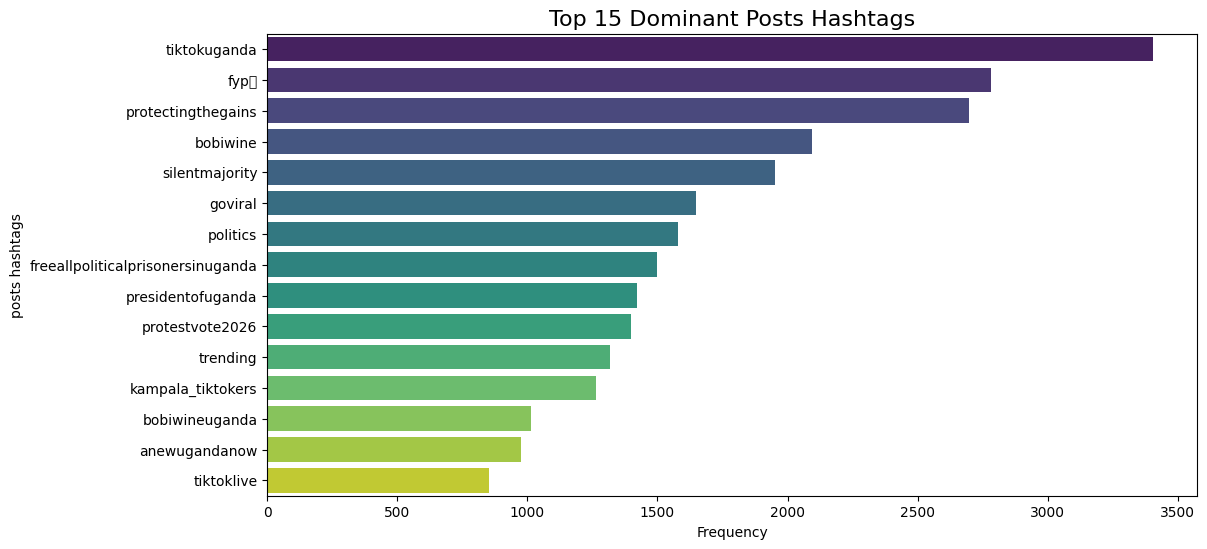

In [72]:
all_hashtags = posts_df['posts hashtags'].explode().dropna()

# Count frequencies
hashtag_counts = all_hashtags.value_counts().head(15)

# Plot Top 15 Hashtags
plt.figure(figsize=(12, 6))
sns.barplot(x=hashtag_counts.values, y=hashtag_counts.index, palette='viridis')
plt.title('Top 15 Dominant Posts Hashtags', fontsize=16)
plt.xlabel('Frequency')
plt.show()

# comments hashtags

/tmp/ipython-input-601475693.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hashtag_counts.values, y=hashtag_counts.index, palette='viridis')


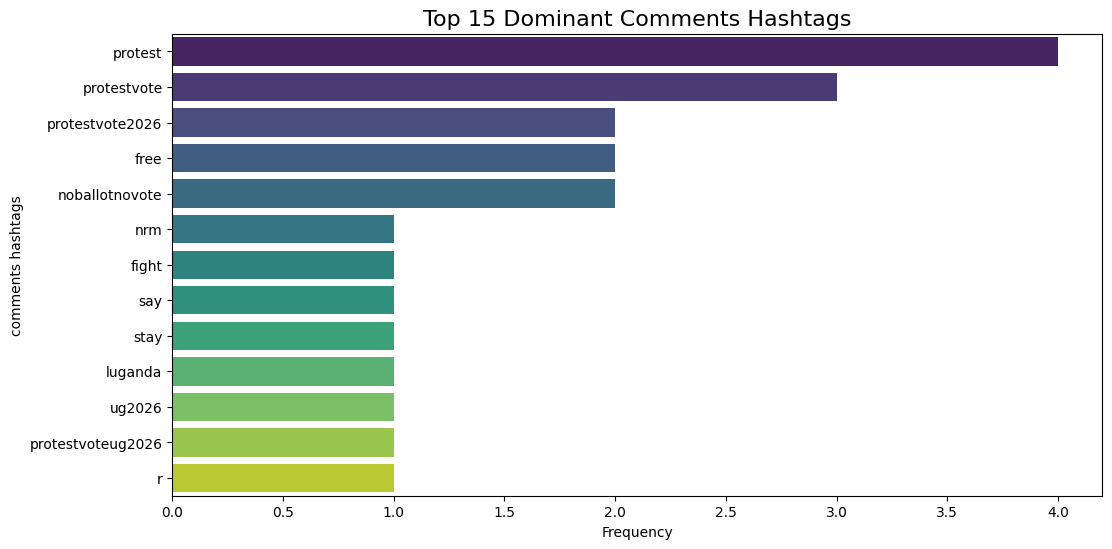

In [73]:
all_hashtags = comments_df['comments hashtags'].explode().dropna()

# Count frequencies
hashtag_counts = all_hashtags.value_counts().head(15)

# Plot Top 15 Hashtags
plt.figure(figsize=(12, 6))
sns.barplot(x=hashtag_counts.values, y=hashtag_counts.index, palette='viridis')
plt.title('Top 15 Dominant Comments Hashtags', fontsize=16)
plt.xlabel('Frequency')
plt.show()

## hashtags usage over time

In [74]:
posts_df['date'] = pd.to_datetime(posts_df['createTimeISO_x'])

<Figure size 1200x600 with 0 Axes>

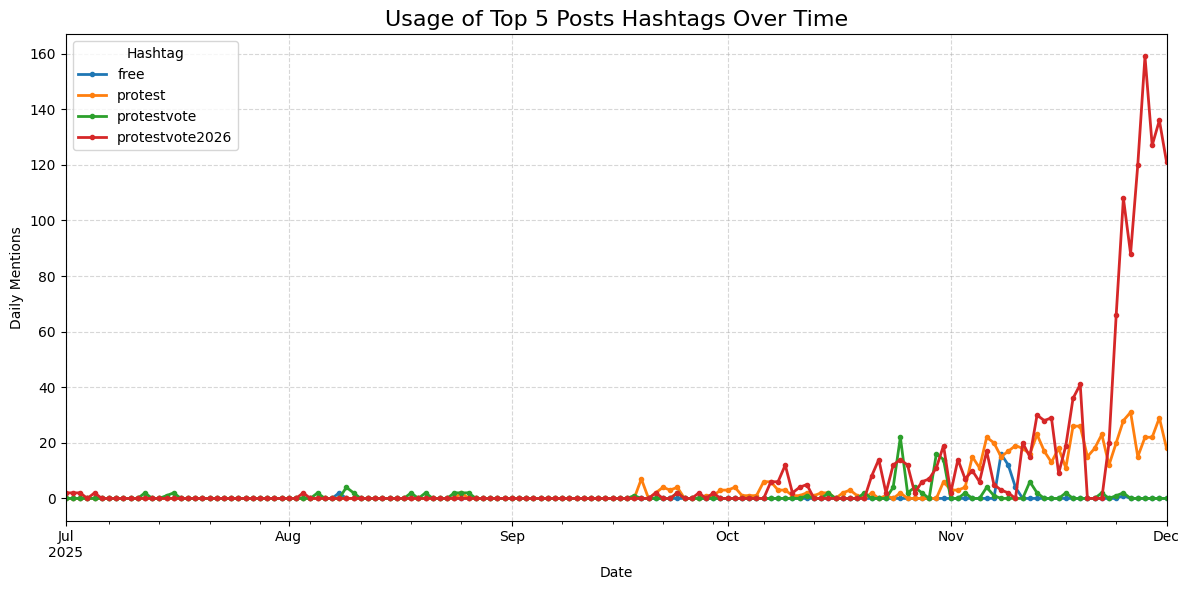

In [75]:
df_tags = posts_df[['date', 'posts hashtags']].explode('posts hashtags').dropna()

top_5_tags = hashtag_counts.head(5).index.tolist()

df_tags_top = df_tags[df_tags['posts hashtags'].isin(top_5_tags)]

# Group by Date and Hashtag to count daily usage
tag_trends = df_tags_top.groupby(['date', 'posts hashtags']).size().unstack(fill_value=0)

# Resample to Daily (or Weekly 'W') to smooth the lines
tag_trends = tag_trends.resample('D').sum()

# Plot
plt.figure(figsize=(12, 6))
tag_trends.plot(kind='line', marker='.', linewidth=2, figsize=(12, 6))
plt.title('Usage of Top 5 Posts Hashtags Over Time', fontsize=16)
plt.ylabel('Daily Mentions')
plt.xlabel('Date')
plt.legend(title='Hashtag')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

## Comments Hashtags

In [76]:
df["createTimeISO_y"]

,createTimeISO_y
0,2025-09-30T21:40:24.000Z
1,2025-10-18T20:34:14.000Z
2,2025-10-01T09:02:08.000Z
3,2025-10-23T07:36:45.000Z
4,2025-10-01T15:03:01.000Z
...,...
508304,None
508305,None
508306,None
508307,None


In [77]:
comments_df['comments date'] = pd.to_datetime(comments_df['createTimeISO_y'])

<Figure size 1200x600 with 0 Axes>

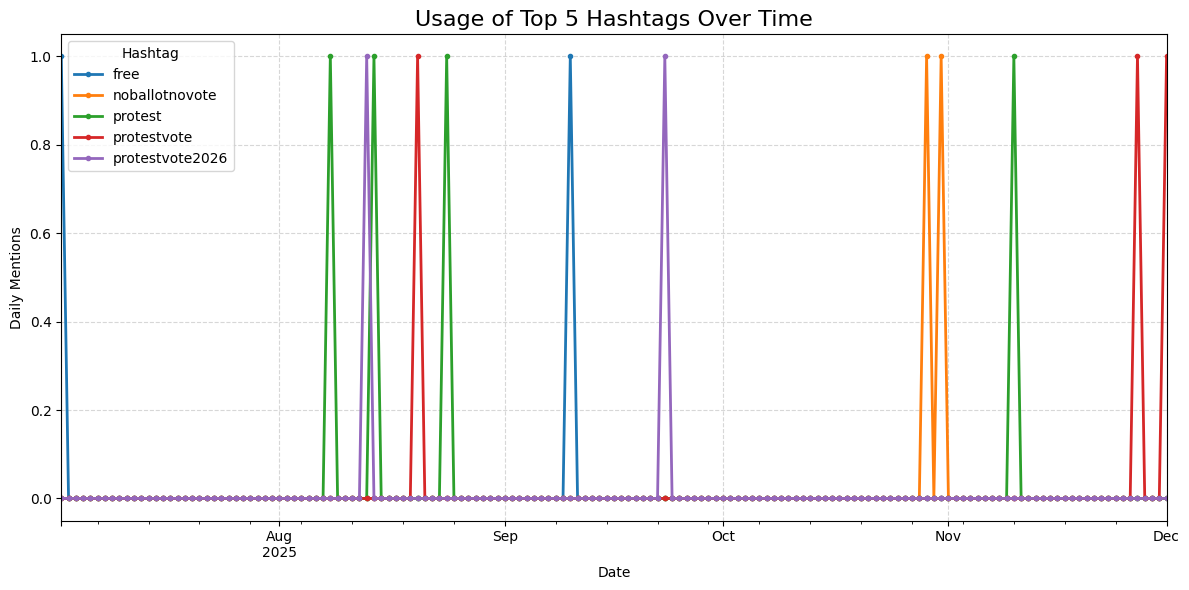

In [78]:
df_tags = comments_df[['comments date', 'comments hashtags']].explode('comments hashtags').dropna()

# Identify the top 5 specific hashtags to track
top_5_tags = hashtag_counts.head(5).index.tolist()

# Filter for only the top 5 tags
df_tags_top = df_tags[df_tags['comments hashtags'].isin(top_5_tags)]

# Group by Date and Hashtag to count daily usage
tag_trends = df_tags_top.groupby(['comments date', 'comments hashtags']).size().unstack(fill_value=0)

# Resample to Daily (or Weekly 'W') to smooth the lines
tag_trends = tag_trends.resample('D').sum()

# Plot
plt.figure(figsize=(12, 6))
tag_trends.plot(kind='line', marker='.', linewidth=2, figsize=(12, 6))
plt.title('Usage of Top 5 Hashtags Over Time', fontsize=16)
plt.ylabel('Daily Mentions')
plt.xlabel('Date')
plt.legend(title='Hashtag')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

## themes

/tmp/ipython-input-3199549858.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Phrase', data=df_themes.head(15), palette='magma')
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12471 (\N{KATAKANA LETTER SI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


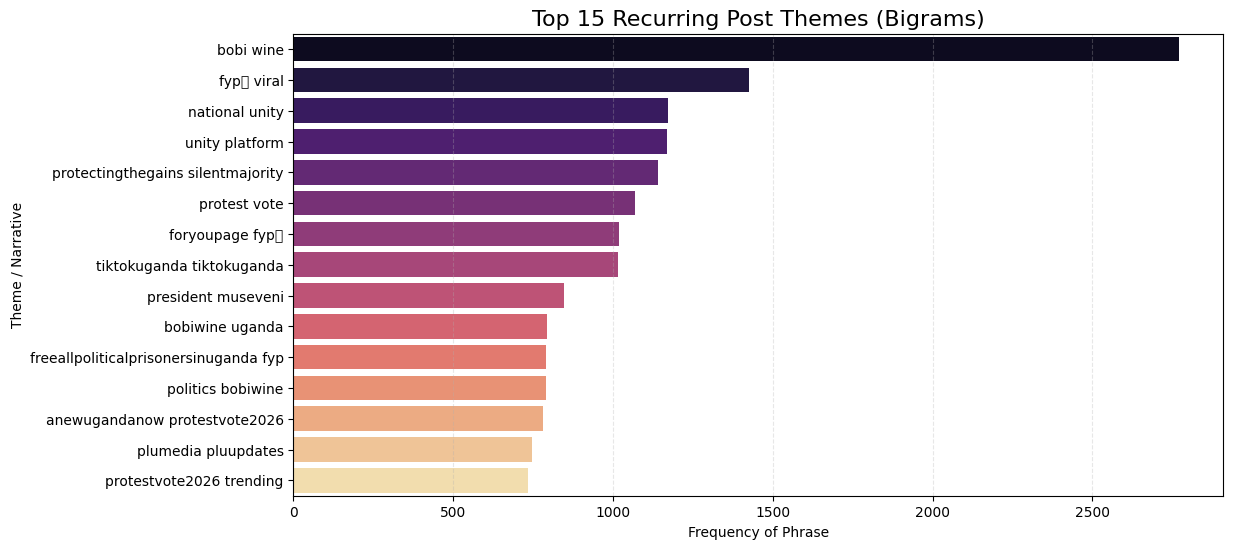

In [79]:
from sklearn.feature_extraction.text import CountVectorizer

clean_text = posts_df['text_x'].dropna().astype(str)

vec = CountVectorizer(ngram_range=(2, 2), stop_words='english', max_features=20)
bow = vec.fit_transform(clean_text)

# Sum up the counts
sum_words = bow.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

# Convert to DataFrame for plotting
df_themes = pd.DataFrame(words_freq, columns=['Phrase', 'Count'])

# Plot Top Themes
plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Phrase', data=df_themes.head(15), palette='magma')
plt.title('Top 15 Recurring Post Themes (Bigrams)', fontsize=16)
plt.xlabel('Frequency of Phrase')
plt.ylabel('Theme / Narrative')
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.show()

/tmp/ipython-input-1669984891.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Phrase', data=df_themes.head(15), palette='magma')


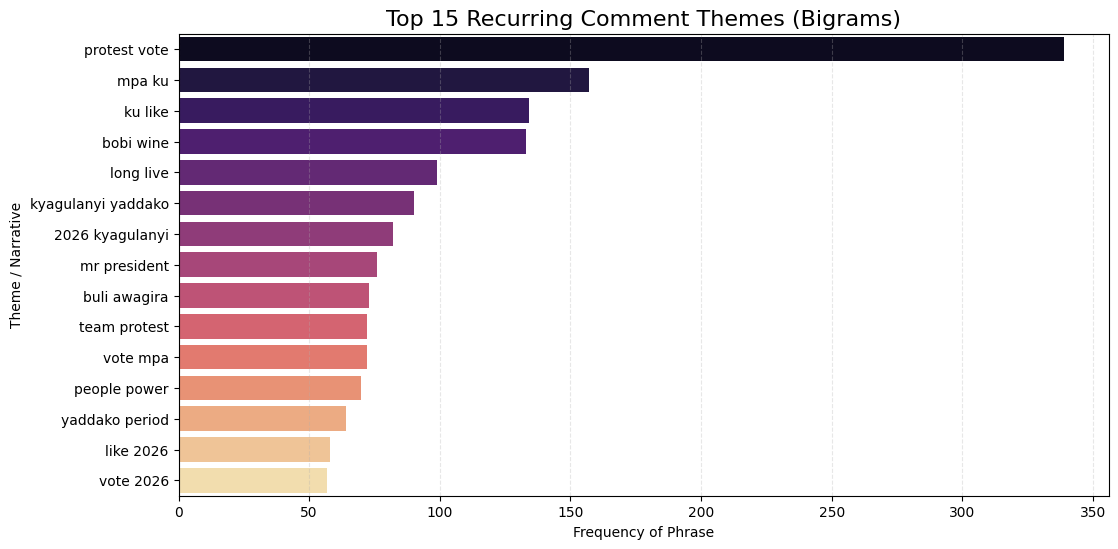

In [80]:

clean_text = comments_df['text_y'].dropna().astype(str)

vec = CountVectorizer(ngram_range=(2, 2), stop_words='english', max_features=20)
bow = vec.fit_transform(clean_text)

sum_words = bow.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

# Convert to DataFrame for plotting
df_themes = pd.DataFrame(words_freq, columns=['Phrase', 'Count'])

# Plot Top Themes
plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Phrase', data=df_themes.head(15), palette='magma')
plt.title('Top 15 Recurring Comment Themes (Bigrams)', fontsize=16)
plt.xlabel('Frequency of Phrase')
plt.ylabel('Theme / Narrative')
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.show()

## Analysis on political party mention

In [81]:
df.columns

Index(['id', 'text_x', 'textLanguage', 'createTime_x', 'createTimeISO_x',
       'isAd', 'authorMeta', 'musicMeta', 'webVideoUrl', 'mediaUrls',
       'videoMeta', 'diggCount_x', 'shareCount', 'playCount', 'collectCount',
       'commentCount', 'mentions_x', 'detailedMentions_x', 'hashtags',
       'effectStickers', 'isSlideshow', 'isPinned', 'isSponsored', 'input_x',
       'fromProfileSection', 'isMuted', 'slideshowImageLinks', 'videoWebUrl',
       'submittedVideoUrl', 'input_y', 'cid', 'createTime_y',
       'createTimeISO_y', 'text_y', 'diggCount_y', 'likedByAuthor',
       'pinnedByAuthor', 'repliesToId', 'replyCommentTotal', 'uid', 'uniqueId',
       'avatarThumbnail', 'mentions_y', 'detailedMentions_y', 'Author Handle',
       'url', 'error', 'date', 'post author'],
      dtype='object')

In [92]:
comments_df['total comments engagement'] = comments_df['diggCount_y'] + comments_df['replyCommentTotal']

In [84]:

party_keywords = {
    'NUP': [r'\bnup\b', r'\bbobi wine\b', r'\bbobi\b'],
    'NRM': [r'\bnrm\b', r'\byoweri\b', r'\bmuseveni\b', r'\bsevo\b'],
    'FDC': [r'\bfdc\b', r'\bbesigye\b'],
    'PDP': [r'\bpdp\b'],
    'DP':  [r'\bdp\b']
}

def check_party_mention(text, patterns):
    if pd.isna(text):
        return 0
    text_lower = str(text).lower()
    for pattern in patterns:
        if re.search(pattern, text_lower):
            return 1
    return 0

for party, patterns in party_keywords.items():
    posts_df[f'mention_{party}'] = posts_df['text_x'].apply(lambda x: check_party_mention(x, patterns))

party_stats = []

for party in party_keywords.keys():
    party_data = posts_df[posts_df[f'mention_{party}'] == 1]

    # Calculate stats
    count = len(party_data)
    avg_eng = party_data['total_engagement'].mean() if count > 0 else 0

    party_stats.append({
        'Party': party,
        'Post_Volume': count,
        'Avg_Engagement': avg_eng
    })

stats_df = pd.DataFrame(party_stats).sort_values(by='Post_Volume', ascending=False)
print(stats_df)

  Party  Post_Volume  Avg_Engagement
0   NUP         3645     2377.360494
1   NRM         3444     1670.322009
2   FDC          223      552.946188
4    DP           23      638.043478
3   PDP            0        0.000000


In [93]:
# Do the same for comments
for party, patterns in party_keywords.items():
    comments_df[f'comments mention_{party}'] = comments_df['text_y'].apply(lambda x: check_party_mention(x, patterns))

comments_party_stats = []

for party in party_keywords.keys():
    party_data = comments_df[comments_df[f'comments mention_{party}'] == 1]

    # Calculate stats
    count = len(party_data)
    avg_eng = party_data['total comments engagement'].mean() if count > 0 else 0

    comments_party_stats.append({
        'Party': party,
        'Post_Volume': count,
        'Avg_Engagement': avg_eng
    })

comments_stats_df = pd.DataFrame(comments_party_stats).sort_values(by='Post_Volume', ascending=False)
print(comments_stats_df)

  Party  Post_Volume  Avg_Engagement
0   NUP          529       73.871456
1   NRM          499       27.927856
2   FDC           62       10.548387
4    DP           10       31.900000
3   PDP            0        0.000000


## Number of mentions per party




/tmp/ipython-input-834773759.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-834773759.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


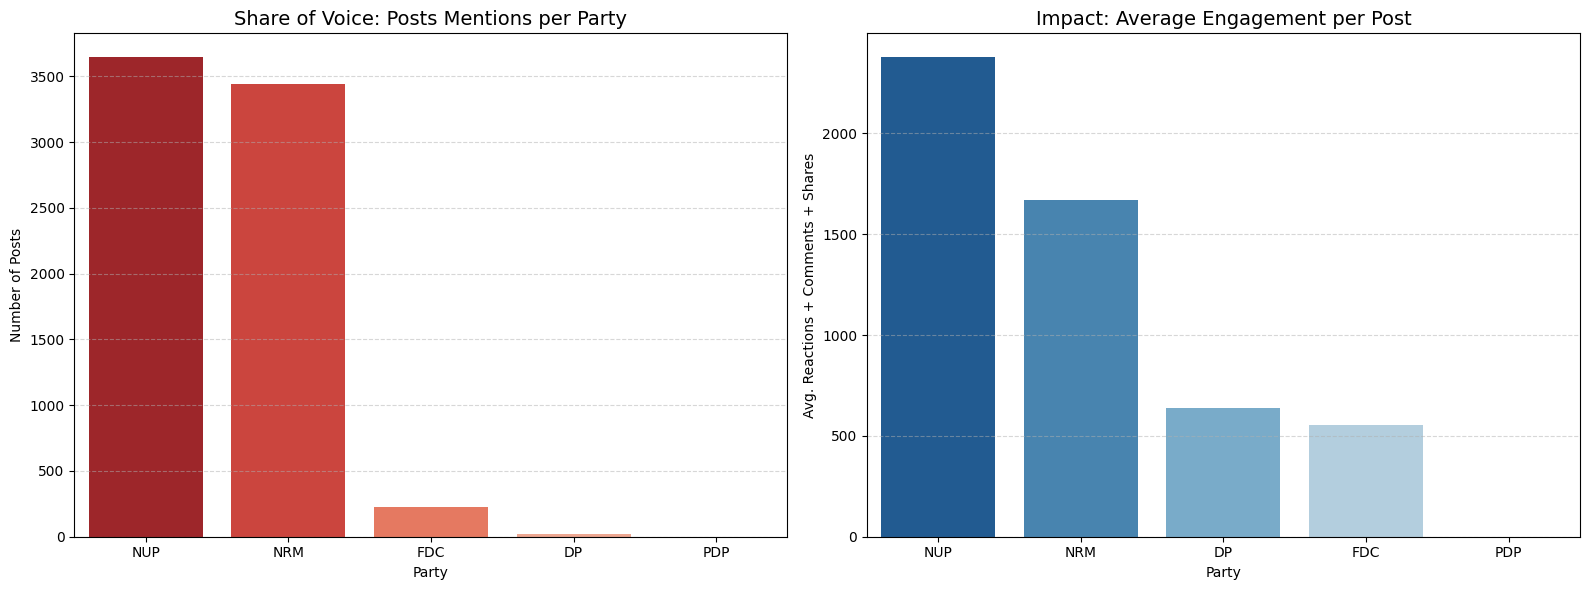

In [94]:
# Create a figure with two subplots (side-by-side)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.barplot(
    data=stats_df,
    x='Party',
    y='Post_Volume',
    ax=axes[0],
    palette='Reds_r'
)
axes[0].set_title('Share of Voice: Posts Mentions per Party', fontsize=14)
axes[0].set_ylabel('Number of Posts')
axes[0].grid(axis='y', linestyle='--', alpha=0.5)

stats_df_eng = stats_df.sort_values(by='Avg_Engagement', ascending=False)

sns.barplot(
    data=stats_df_eng,
    x='Party',
    y='Avg_Engagement',
    ax=axes[1],
    palette='Blues_r'
)
axes[1].set_title('Impact: Average Engagement per Post', fontsize=14)
axes[1].set_ylabel('Avg. Reactions + Comments + Shares')
axes[1].grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

## Comments

/tmp/ipython-input-2382765924.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-2382765924.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


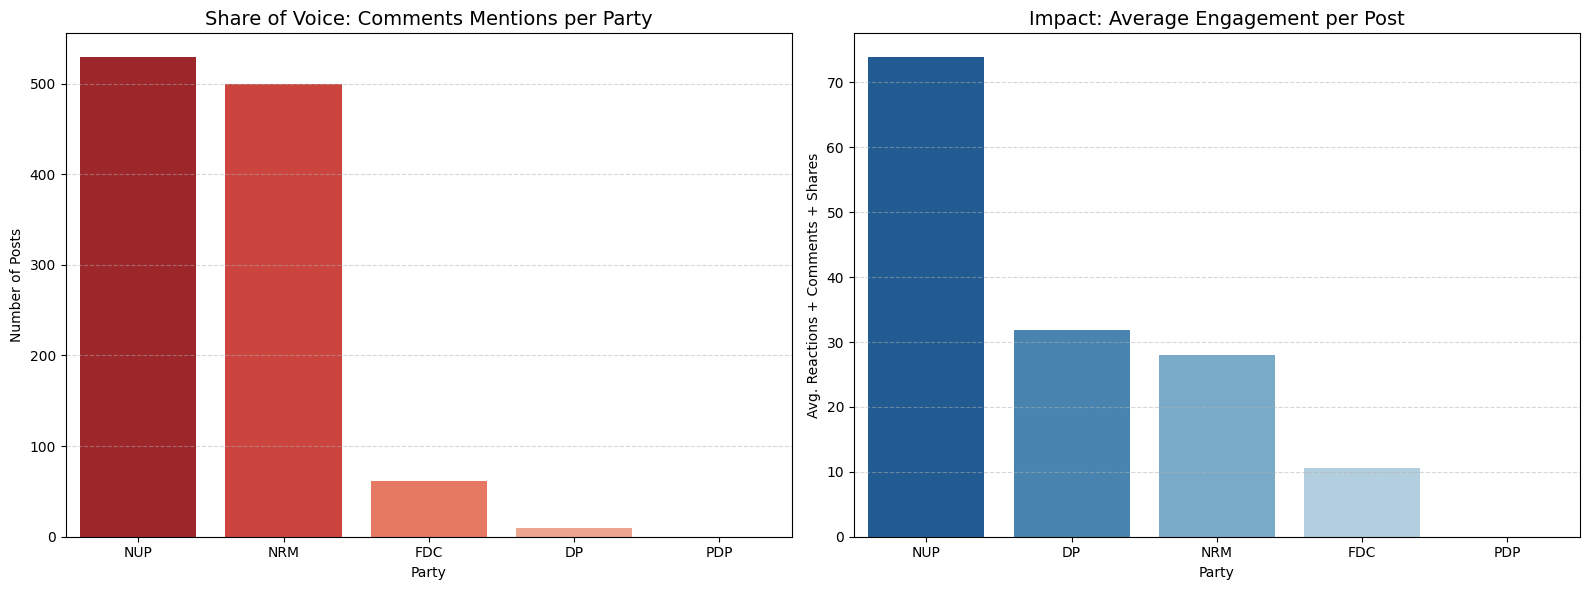

In [95]:
# Create a figure with two subplots (side-by-side)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.barplot(
    data=comments_stats_df,
    x='Party',
    y='Post_Volume',
    ax=axes[0],
    palette='Reds_r' # Red theme (adjust as needed)
)
axes[0].set_title('Share of Voice: Comments Mentions per Party', fontsize=14)
axes[0].set_ylabel('Number of Posts')
axes[0].grid(axis='y', linestyle='--', alpha=0.5)


stats_df_eng = comments_stats_df.sort_values(by='Avg_Engagement', ascending=False)

sns.barplot(
    data=stats_df_eng,
    x='Party',
    y='Avg_Engagement',
    ax=axes[1],
    palette='Blues_r'
)
axes[1].set_title('Impact: Average Engagement per Post', fontsize=14)
axes[1].set_ylabel('Avg. Reactions + Comments + Shares')
axes[1].grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

## Political party Engagement overtime




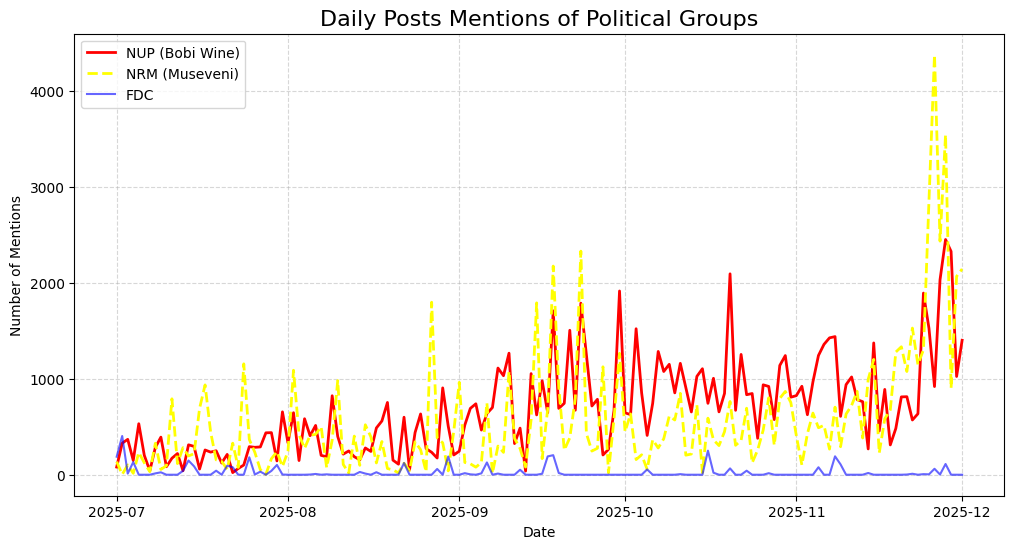

In [96]:
df_time = df[['date', 'mention_NUP', 'mention_NRM', 'mention_FDC', 'mention_DP', 'mention_PDP']].copy()

party_time = df_time.set_index('date').resample('D').sum()

# Plot
plt.figure(figsize=(12, 6))
# Plotting specific columns
plt.plot(party_time.index, party_time['mention_NUP'], label='NUP (Bobi Wine)', color='red', linewidth=2)
plt.plot(party_time.index, party_time['mention_NRM'], label='NRM (Museveni)', color='yellow', linewidth=2, linestyle='--')
plt.plot(party_time.index, party_time['mention_FDC'], label='FDC', color='blue', alpha=0.6)

plt.title('Daily Posts Mentions of Political Groups', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Number of Mentions')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

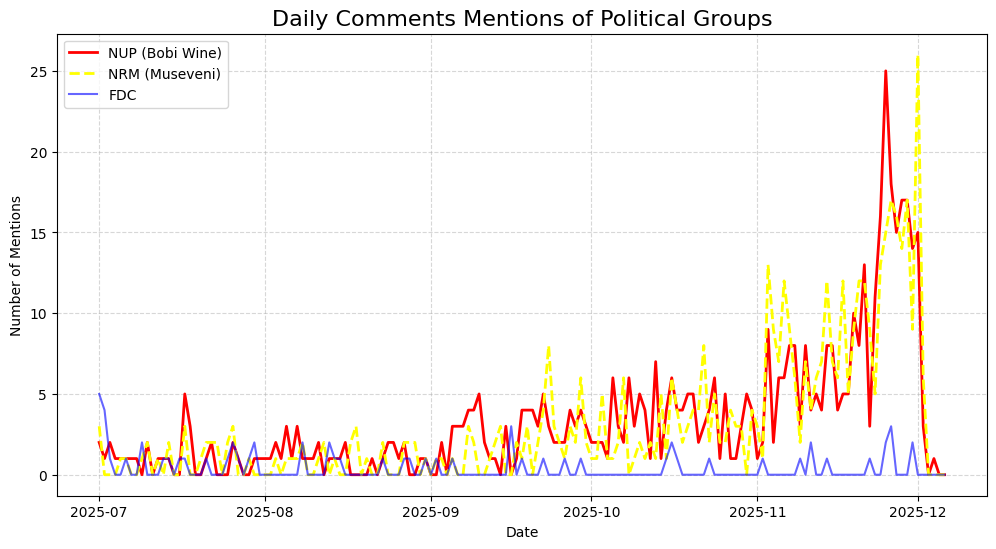

In [97]:
# Select the party columns + date
df_time = comments_df[['comments date', 'comments mention_NUP', 'comments mention_NRM', 'comments mention_FDC', 'comments mention_DP', 'comments mention_PDP']].copy()

# Set date index and resample by Day or Week
party_time = df_time.set_index('comments date').resample('D').sum()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(party_time.index, party_time['comments mention_NUP'], label='NUP (Bobi Wine)', color='red', linewidth=2)
plt.plot(party_time.index, party_time['comments mention_NRM'], label='NRM (Museveni)', color='yellow', linewidth=2, linestyle='--')
plt.plot(party_time.index, party_time['comments mention_FDC'], label='FDC', color='blue', alpha=0.6)

plt.title('Daily Comments Mentions of Political Groups', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Number of Mentions')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

## Video Meta Analysis

In [98]:
df['videoMeta'].iloc[0]

"{'height': 1024, 'width': 576, 'duration': 75, 'coverUrl': 'https://p16-sign-va.tiktokcdn.com/tos-maliva-p-0068/oYKcgBaNSUA6SiYB2ioB3XEE6Ec5PBwJ1QwDI~tplv-tiktokx-origin.image?dr=10395&x-expires=1764892800&x-signature=3%2Bw%2Blywmnf5HOGo6Zwbg3cGcBk4%3D&t=4d5b0474&ps=13740610&shp=81f88b70&shcp=43f4a2f9&idc=useast2b', 'originalCoverUrl': 'https://p16-sign-va.tiktokcdn.com/tos-maliva-p-0068/oYKcgBaNSUA6SiYB2ioB3XEE6Ec5PBwJ1QwDI~tplv-tiktokx-origin.image?dr=10395&x-expires=1764892800&x-signature=3%2Bw%2Blywmnf5HOGo6Zwbg3cGcBk4%3D&t=4d5b0474&ps=13740610&shp=81f88b70&shcp=43f4a2f9&idc=useast2b', 'definition': '540p', 'format': 'mp4'}"

In [99]:
import json

def get_duration(meta_str):
    try:
        # Replace single quotes with double quotes to make it JSON-compatible
        meta_str = meta_str.replace("'", '"')
        meta_dict = json.loads(meta_str)
        return meta_dict.get('duration', None)
    except Exception:
        return None  # return None if parsing fails

# Apply to DataFrame
posts_df['duration'] = posts_df['videoMeta'].apply(get_duration)
posts_df['duration']

,duration
0,75.0
264,29.0
332,52.0
418,33.0
424,59.0
...,...
508304,45.0
508305,14.0
508306,57.0
508307,16.0


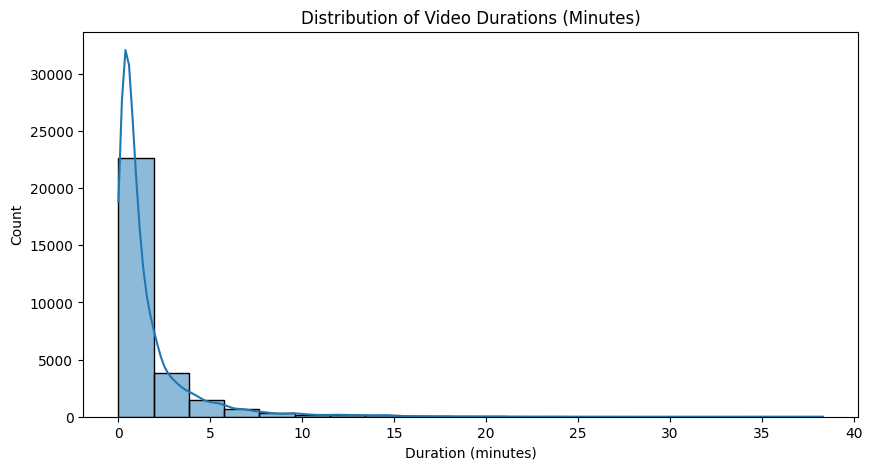

In [100]:
# Convert duration to minutes
posts_df['duration_min'] = posts_df['duration'] / 60

#  Distribution of video durations in minutes
plt.figure(figsize=(10,5))
sns.histplot(posts_df['duration_min'], bins=20, kde=True)
plt.title("Distribution of Video Durations (Minutes)")
plt.xlabel("Duration (minutes)")
plt.ylabel("Count")
plt.show()

In [101]:
posts_df['duration_min'].sort_values(ascending=False)

,duration_min
496241,38.316667
463265,36.866667
253402,29.516667
222480,29.516667
321218,27.683333
...,...
403551,NaN
405687,NaN
457408,NaN
499008,NaN


# video durations over time

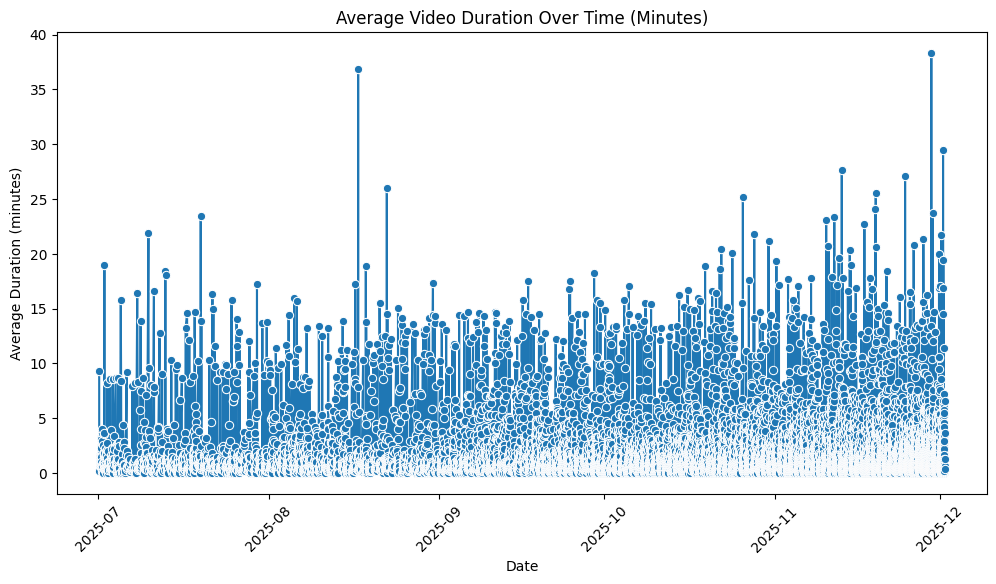

In [104]:
daily_avg = posts_df.groupby('date')['duration_min'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=daily_avg, x='date', y='duration_min', marker='o')
plt.title("Average Video Duration Over Time (Minutes)")
plt.xlabel("Date")
plt.ylabel("Average Duration (minutes)")
plt.xticks(rotation=45)
plt.show()


## Effect Stickers

In [105]:
# Function to extract phone type
def get_phone_type(sticker_str):
    try:
        # Replace single quotes with double quotes for JSON parsing
        sticker_str = sticker_str.replace("'", '"')
        stickers = json.loads(sticker_str)
        if stickers and isinstance(stickers, list):
            return stickers[0].get('name', None)
    except Exception:
        return None

df['phone_type'] = df['effectStickers'].apply(get_phone_type)


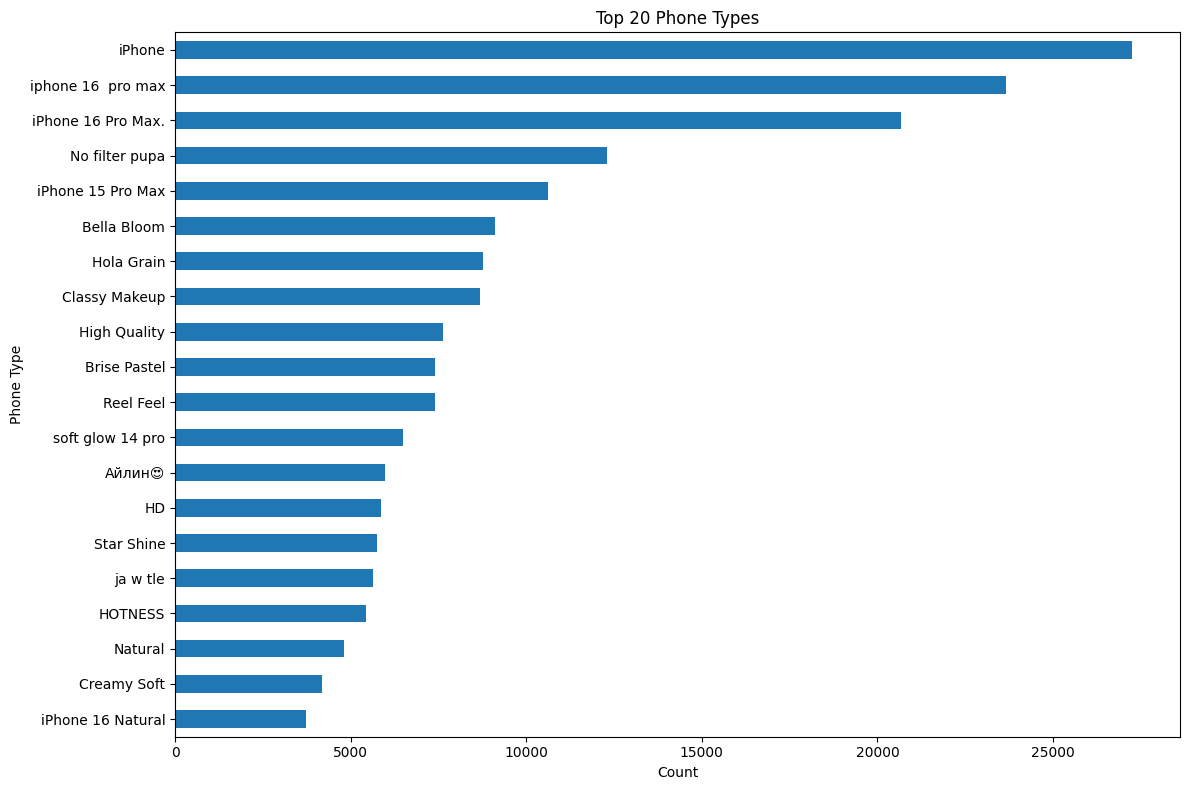

In [106]:
# Strip whitespace without dropping rows
df['phone_type'] = df['phone_type'].astype(str).str.strip()

# Replace invalid string values with NaN
df.loc[df['phone_type'].isin(['', 'nan', 'None']), 'phone_type'] = pd.NA

clean_phone = df['phone_type'].dropna()
top_20_counts = clean_phone.value_counts().nlargest(20)

plt.figure(figsize=(12, 8))
top_20_counts.plot(kind='barh')
plt.title("Top 20 Phone Types")
plt.xlabel("Count")
plt.ylabel("Phone Type")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
